Importing all the necessaty libraries

# Heart Disease Prediction System Using Machine Learning

##### In this project we will try to predict weather a person have heart disease or not using the clinical data and machine learning. We Will Try To Achieve 85% Accuracy Initially. For This Project We Will Use The Heart Data set from Kaggle.

The Dataset contains the following data 

1. age
2. sex (1 = male; 0 = female) 
3. chest pain type (4 values)
    0. Typical angina: chest pain related to decreased blood supply to the heart.
    1. Atypical angina: chest pain not related to the heart.
    2. Non-anginal pain: typically esophageal spasms (non-heart related).
    3. Asymptomatic: chest pain not showing signs of disease.
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target: have disease or not (1 = yes, 0 = no)(= Predicted Value)

In [1]:
# importing libraries for Exploratory Data Analysis(EDA)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
#loading the data
dataset = pd.read_csv("heart.csv")
dataset.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [6]:
#checking the shape of dataset
dataset.shape
#the dataset has 1025 cols and 14 rows

(1025, 14)

Checking Null Values In The Dataset
##### We will use the `isnull()` function to identify the null values in the dataset.

In [9]:
#There's No Null Values in the Dataset
dataset.isnull().sum().sum()

np.int64(0)

In [ ]:
# Now We Will Check For Outliers using the describe function
# The Describe function will also provide us with mean, std and IQR values
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [33]:
#The Target Value Contains 2 values 0 and 1
# If the Value is 1 it means the person have disease
# If the Value is 0 it means the person don't have disease
dataset.target.unique()

array([0, 1])

In [57]:
# dataset.target.value_counts() provide us with the total count of 1's and 0's in the dataset using that we found the %age of
# people Suferring from Heart Disease and %age of People who are not

# We Found That 51% people are sufferring and 48% are not

temp_target = dataset.target.value_counts()
people_Without_Heart_Disease = temp_target[0]/1025 *100
people_With_Heart_Disease = temp_target[1]/1025 *100

print("People With Heart Disease is : ", people_With_Heart_Disease)
print("People Without Heart Disease is : ", people_Without_Heart_Disease)

People With Heart Disease is :  51.31707317073171
People Without Heart Disease is :  48.68292682926829


target
1    526
0    499
Name: count, dtype: int64

[Text(0, 0, 'With Heart Disease'), Text(1, 0, 'Without Heart Disease')]

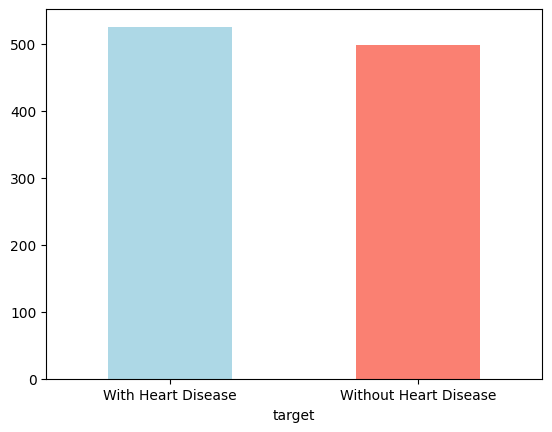

In [65]:
# The Bar Graph Shows the above data in pictorial format
temp_target.plot(kind="bar", color={"salmon", "lightblue"}).set_xticklabels(["With Heart Disease","Without Heart Disease"], rotation=0)

In [71]:
# Here We get how many males and females are there in the dataset
# There are 713 males and 312 females
dataset.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

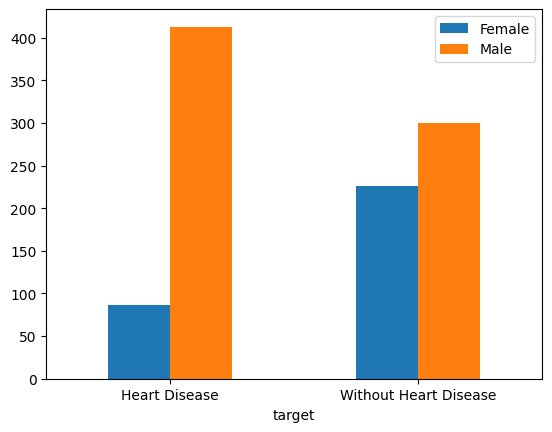

In [ ]:
#From The Figure We also find that Heart Disease is more common in males than female
pd.crosstab(dataset.target, dataset.sex).plot(kind="bar").set_xticklabels(["Heart Disease","Without Heart Disease"],rotation=0)
plt.legend(["Female","Male"])

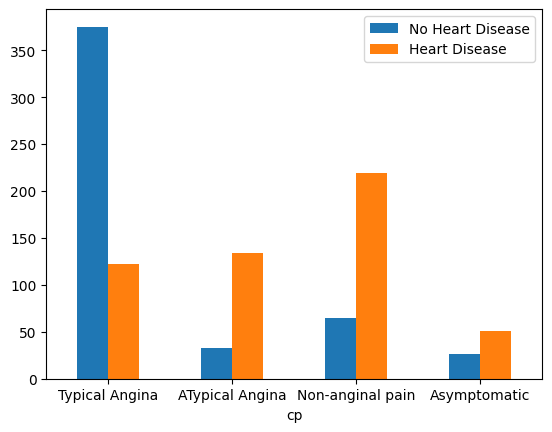

In [ ]:
# From The Plot Below We can deduce that most patient suffer from Non-anginal Chest pain  
# We also found out that Typical Angina is most common but it does result in chest pain always, majority Typical Angina Pain resulted in No Heart Disease
# Where as Most Heart disease is causes by Non-Anginal Pain and ATypical Angina
pd.crosstab(dataset.cp, dataset.target).plot(kind="bar").set_xticklabels(["Typical Angina","ATypical Angina","Non-anginal pain","Asymptomatic"],rotation=0)
plt.legend(["No Heart Disease", "Heart Disease"])

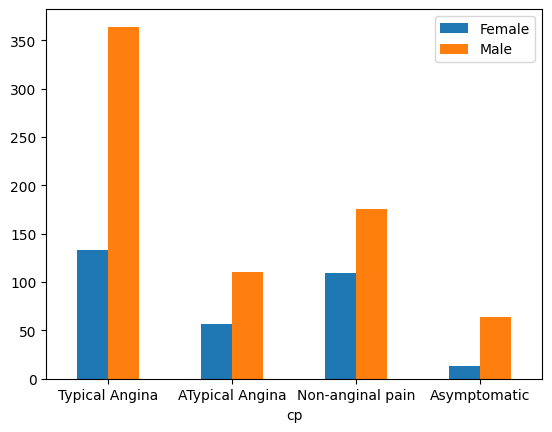

In [112]:
#From The Figure We also find that All Chest Pain Symptoms is more common in males than female

pd.crosstab(dataset.cp, dataset.sex,).plot(kind="bar").set_xticklabels(["Typical Angina","ATypical Angina","Non-anginal pain","Asymptomatic"],rotation=0)
plt.legend(["Female","Male"])

<Axes: ylabel='Frequency'>

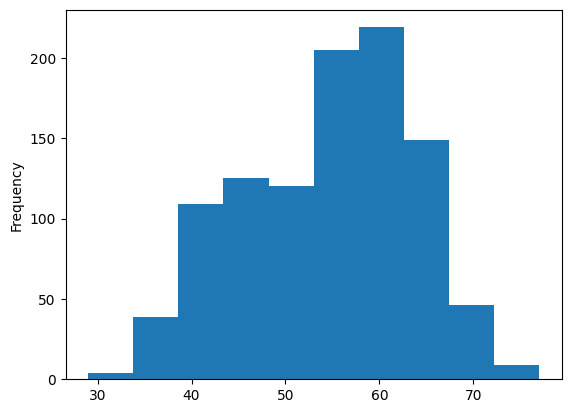

In [118]:
dataset.age.plot.hist()